Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
# first, let's just make sure the reference image is easily accessible

from IPython.display import Image, display
eg_url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
eg = Image(url=eg_url, width=400)
def deg():
  display(eg)
deg()

In [7]:
# next, let's load the dataset

%matplotlib inline
import pandas as pd
data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'
df = pd.read_csv(data_url)
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [8]:
# make sure the timestamp column
# is an actual timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp      datetime64[ns]
respondents             int64
category               object
link                   object
average               float64
mean                  float64
median                  int64
1_votes                 int64
2_votes                 int64
3_votes                 int64
4_votes                 int64
5_votes                 int64
6_votes                 int64
7_votes                 int64
8_votes                 int64
9_votes                 int64
10_votes                int64
1_pct                 float64
2_pct                 float64
3_pct                 float64
4_pct                 float64
5_pct                 float64
6_pct                 float64
7_pct                 float64
8_pct                 float64
9_pct                 float64
10_pct                float64
dtype: object

In [0]:
# use it as the index for the dataframe
# (a lot of these steps aren't really necessary,
# I'm just following the lecture notebook step-by-step)

df = df.set_index('timestamp')

In [14]:
# the distribution of votes is cumulative,
# which means the data we are interested in
# can simply be found in the last row
# of the last day

lastday = df['2017-08-29']
lastdayf = lastday[lastday['category'] == 'IMDb users']
pct_cols = ['%d_pct' % (n + 1) for n in range(10)]
final = lastdayf.tail(1)[pct_cols].T
final.index = range(1, 11)
final.columns = ['percent']
final

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


In [15]:
deg()

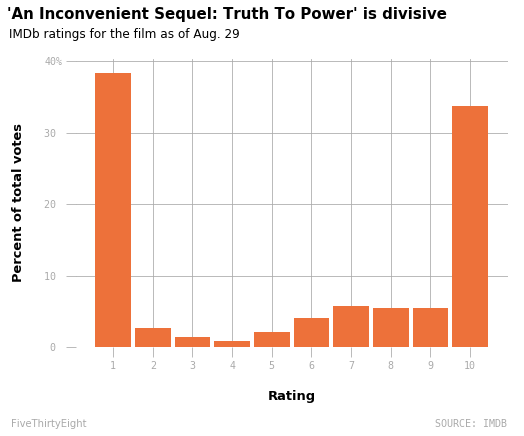

In [161]:
# here we go: recreate the graph

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# the grid lines don't seem to have an overall border;
# so de-spine the subplot
ax.grid(color='#aaaaaa')
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# why on earth would you want your grid on top of the data?
ax.set_axisbelow(True)

# draw the actual bars
ax.bar(x=final.index,
       height=final['percent'],
       color='#ed713a',
       width=0.9)

# I decided to use the figure's `suptitle` for the main title,
# and the subplot's `title` for the subtitle
# (positioning the subplot relative to the suptitle)
plt.suptitle("'An Inconvenient Sequel: Truth To Power' is divisive",
             horizontalalignment='right',
             x=0.99,
             fontsize=15,
             fontweight='bold')
ax.set_title('IMDb ratings for the film as of Aug. 29\n',
             horizontalalignment='right',
             x=0.38)
ax.set_position([0.13, -0.2, 1, 1])

# set the ticks, their labels, and the tick parameters
ax.set_xlabel('\nRating', fontweight='bold', fontsize=13)
ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11), fontname='monospace')
ax.set_ylabel('Percent of total votes\n', fontweight='bold', fontsize=13)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(('0 ', '10 ', '20 ', '30 ', '40%'), fontname='monospace')
ax.tick_params(axis='both', colors='#aaaaaa', length=10)

# add the sources at the bottom
# (I couldn't figure out how to add the gray dividing line D:)
plt.annotate('FiveThirtyEight', (-0.15, -0.18), (0, -20),
             xycoords='axes fraction',
             textcoords='offset points',
             va='top',
             color='#aaaaaa')
plt.annotate('SOURCE: IMDB', (0.83, -0.18), (1, -20),
             xycoords='axes fraction',
             textcoords='offset points',
             fontname='monospace',
             color='#aaaaaa',
             va='top')

# TA DAAA
plt.show()

In [59]:
deg()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

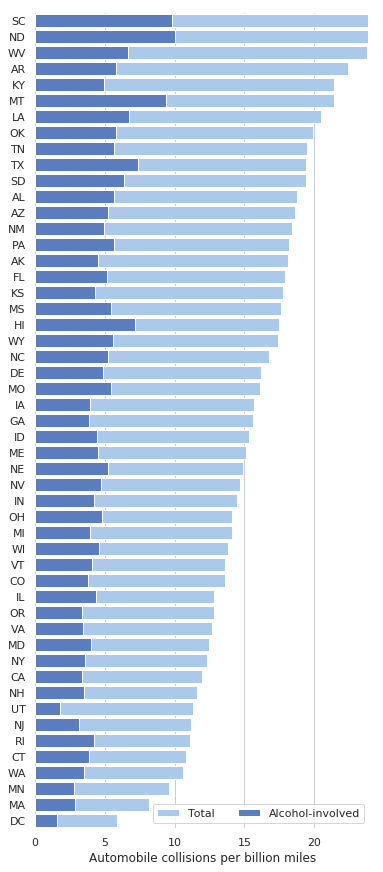

In [179]:
# Chose to recreate http://seaborn.pydata.org/examples/horizontal_barplot.html
# In all honesty, I mostly copied code instead of looking and coding
# But I have no idea how this stuff works,
# and I made to sure to type it instead of copy/paste ¯\_(ツ)_/¯

import seaborn as sns
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(6, 15))
sns.despine(left=True, bottom=True)

# use seaborn's car crash dataset
crashes = sns.load_dataset('car_crashes')
crashes = crashes.sort_values('total', ascending=False)

# graph the total crashes per state
sns.set_color_codes('pastel')
sns.barplot(x='total',
            y='abbrev',
            data=crashes,
            color='b',
            label='Total')

# graph the alcohol-related crashes by state
sns.set_color_codes('muted')
sns.barplot(x='alcohol',
            y='abbrev',
            data=crashes,
            color='b',
            label='Alcohol-involved')

# add the legend
ax.legend(ncol=2)

# add the label at the bottom of the graph
ax.set(xlim=(0,24),
       ylabel='',
       xlabel='Automobile collisions per billion miles')

plt.show()

# ooooh my god seaborn is so much nicer to use